In [11]:
import mogreps
import netCDF4

from matplotlib import pyplot as plt 

import cartopy.crs as ccrs

import iris

f = mogreps.download_data(
    'mogreps-uk',
    mogreps.make_data_object_name('mogreps-uk', 2013, 1, 1, 3, 0, 3),
    data_folder=mogreps.Path('.'))
    # dataset_name, year, month, day, hour, realization, forecast_period

File prods_op_mogreps-uk_20130101_03_00_003.nc already exists.


In [5]:
data_set = netCDF4.Dataset(f)
data_set.variables.keys()

odict_keys(['wet_bulb_potential_temperature', 'rotated_latitude_longitude', 'time', 'pressure', 'grid_latitude', 'grid_longitude', 'forecast_period', 'forecast_reference_time', 'cloud_base_altitude_assuming_only_consider_cloud_area_fraction_greater_than_2p5_oktas', 'time_0', 'forecast_period_0', 'cloud_area_fraction_assuming_maximum_random_overlap', 'stratiform_snowfall_rate', 'time_1', 'forecast_period_1', 'wet_bulb_freezing_level_altitude', 'time_2', 'forecast_period_2', 'air_pressure_at_sea_level', 'air_temperature', 'pressure_0', 'air_temperature_0', 'height', 'air_temperature_1', 'time_3', 'time_3_bnds', 'forecast_period_3', 'forecast_period_3_bnds', 'air_temperature_2', 'dew_point_temperature', 'fog_area_fraction', 'geopotential_height', 'pressure_1', 'high_type_cloud_area_fraction', 'low_type_cloud_area_fraction', 'medium_type_cloud_area_fraction', 'relative_humidity', 'relative_humidity_0', 'specific_humidity', 'stratiform_rainfall_amount', 'forecast_period_4', 'forecast_period

In [9]:
data_set.variables['forecast_period_0'][:]
data_set.variables['forecast_reference_time']
#data_set.variables
data_set['grid_longitude'].shape
data_set['air_temperature_2'].shape

(3, 548, 421)

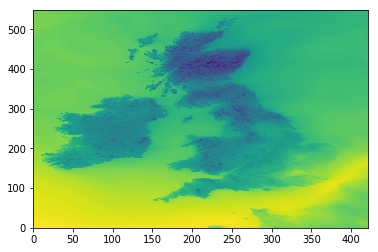

In [7]:
# plt.pcolormesh(data_set.variables['air_temperature_2'][0])
# plt.colorbar()
# plt.title('Air temperature 2')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.pcolormesh(data_set.variables['air_temperature_2'][0])
#ax.colorbar()
#ax.title('Air temperature 2')

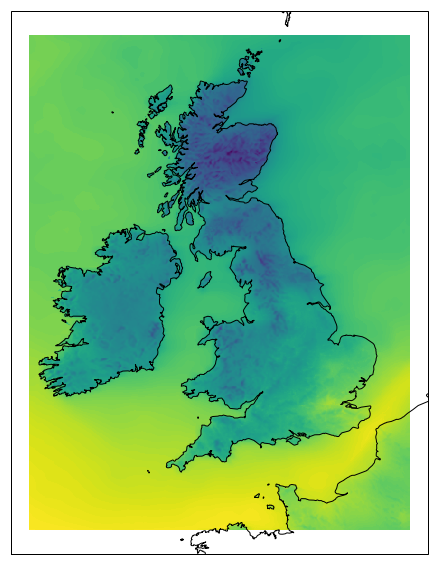

In [10]:
rotation = data_set['rotated_latitude_longitude']
transform = ccrs.RotatedPole(
    pole_longitude=rotation.grid_north_pole_longitude, 
    pole_latitude=rotation.grid_north_pole_latitude)
projection = transform
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection=projection)
pcm = ax.pcolormesh(data_set['grid_longitude'], data_set['grid_latitude'], data_set['air_temperature_2'][0], transform=transform)
ax.coastlines(resolution='10m')


In [18]:
air_temps = data_set.variables['air_temperature']#[:]#mydata.extract('air_temperature')
print(air_temps) # print is not as nice without iris

surface_temp = air_temps[2]
print(surface_temp)  # print is not as nice without iris

#print(surface_temp.coord('time')) # 'MaskedArray' object has no attribute 'coord'
surface_temp.data # works fine without iris

# All forecasts for a particular point:
print(surface_temp[:, 100, 300])

<class 'netCDF4._netCDF4.Variable'>
float32 air_temperature(time, pressure_0, grid_latitude, grid_longitude)
    _FillValue: -1073741800.0
    standard_name: air_temperature
    units: K
    um_stash_source: m01s16i203
    grid_mapping: rotated_latitude_longitude
    coordinates: forecast_period forecast_reference_time
unlimited dimensions: time
current shape = (4, 2, 548, 421)
filling on
[[[256.5 256.5 256.5 ... 249.5 249.625 249.625]
  [256.5 256.5 256.5 ... 249.5 249.625 249.625]
  [256.5 256.5 256.5 ... 249.5 249.5 249.625]
  ...
  [245.25 245.25 245.25 ... 238.25 238.25 238.375]
  [245.25 245.25 245.25 ... 238.25 238.25 238.25]
  [245.25 245.25 245.25 ... 238.125 238.25 238.25]]

 [[271.75 271.75 271.75 ... 273.75 273.75 273.75]
  [271.75 271.75 271.75 ... 273.75 273.75 273.75]
  [271.75 271.75 271.75 ... 273.75 273.75 273.75]
  ...
  [270.375 270.375 270.375 ... 268.75 268.875 268.875]
  [270.375 270.375 270.375 ... 268.75 268.75 268.875]
  [270.375 270.375 270.375 ... 268.75 268